## Importando bibliotecas

## Obtendo Dataset

In [2]:
# notebooks/Seu_Notebook_Principal.ipynb

import sys
import os

# Adiciona a pasta 'scripts' ao PATH do Python para que possamos importar módulos dela
# Isso é crucial se o notebook está em 'notebooks' e a função em 'scripts'
project_root = os.path.dirname(os.path.abspath('')) # Volta para o nível da 'Pasta do Projeto'
scripts_path = os.path.join(project_root, 'scripts')
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Agora você pode importar a função
from data_loader import load_data_with_fallback

# --- Configurações para o seu DataFrame ---
# A URL do seu arquivo CSV no GitHub
my_github_url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/df_final.csv'
# O nome do arquivo (deve ser o mesmo no GitHub e localmente)
my_file_name = 'df_final.csv'

# Chama a função para carregar os dados
dados = load_data_with_fallback(
    github_raw_url=my_github_url,
    file_name=my_file_name,
    local_data_dir='dados', # Confirma que a pasta local é 'dados'
    timeout_seconds=120 # Pode ajustar o timeout aqui
)

# Verifica se o DataFrame foi carregado antes de prosseguir
if dados is not None:
    print("\nDataFrame 'dados' pronto para análise!")
else:
    print("\nNão foi possível carregar o DataFrame. Verifique as mensagens de erro acima.")

INFO: Tentando ler os dados do GitHub da URL: https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/df_final.csv
INFO: Dados lidos com sucesso do GitHub!
INFO: DataFrame carregado com sucesso! Shape: (7032, 23)



DataFrame 'dados' pronto para análise!


## Análise Preliminar no Dataset

In [3]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureGroup,DailyCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0-12 Meses,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0-12 Meses,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0-12 Meses,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,13-24 Meses,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0-12 Meses,2.796667


In [4]:
# Visualização inicial dos dados


dados.info()
dados.describe(include='O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TenureGroup
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0-12 Meses
freq,1,5163,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,2175


## Análise Exploratória Complementar (EDA)

In [5]:
import numpy as np

# Matriz de correlação com valores absolutos
corr_matrix = dados.corr(numeric_only=True).abs()

# Seleciona correlações acima de um limiar
threshold = 0.8  # Corr. forte
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Variáveis altamente correlacionadas
high_corr_pairs = [(col, row) for col in upper_tri.columns for row in upper_tri.index if upper_tri.loc[row, col] > threshold]

print("Pares de variáveis com alta correlação (> 0.8):")
for var1, var2 in high_corr_pairs:
    print(f"{var1} <--> {var2} | Corr: {corr_matrix.loc[var1, var2]:.2f}")


Pares de variáveis com alta correlação (> 0.8):
TotalCharges <--> tenure | Corr: 0.83
DailyCharges <--> MonthlyCharges | Corr: 1.00


In [6]:
# Avaliando cardinalidade das variáveis categóricas
categorical_cols = dados.select_dtypes(include='object').columns

for col in categorical_cols:
    n_unique = dados[col].nunique()
    print(f"{col}: {n_unique} categorias únicas")


customerID: 7032 categorias únicas
Churn: 2 categorias únicas
gender: 2 categorias únicas
Partner: 2 categorias únicas
Dependents: 2 categorias únicas
PhoneService: 2 categorias únicas
MultipleLines: 3 categorias únicas
InternetService: 3 categorias únicas
OnlineSecurity: 3 categorias únicas
OnlineBackup: 3 categorias únicas
DeviceProtection: 3 categorias únicas
TechSupport: 3 categorias únicas
StreamingTV: 3 categorias únicas
StreamingMovies: 3 categorias únicas
Contract: 3 categorias únicas
PaperlessBilling: 2 categorias únicas
PaymentMethod: 4 categorias únicas
TenureGroup: 5 categorias únicas


In [7]:
from sklearn.feature_selection import VarianceThreshold

# Seleção das numéricas apenas
dados_numericos = dados.select_dtypes(include='number')

# Define threshold de variância mínima (ex: 1% de variância)
selector = VarianceThreshold(threshold=0.01)
selector.fit(dados_numericos)

# Quais foram eliminadas
low_variance_cols = dados_numericos.columns[~selector.get_support()]
print("Variáveis com baixa variância:")
print(list(low_variance_cols))


Variáveis com baixa variância:
[]


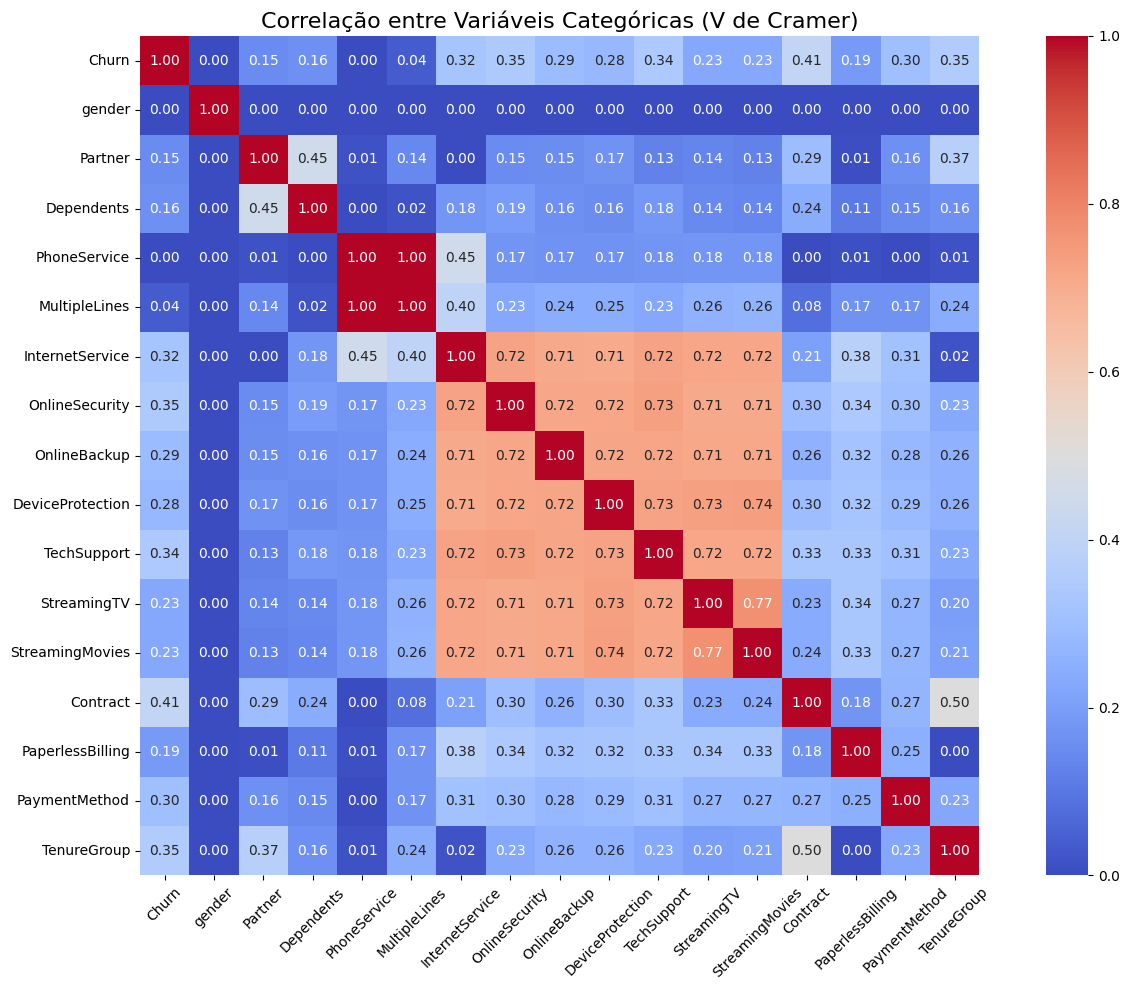

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Função para calcular o V de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Selecionar apenas colunas categóricas
categorical_cols = dados.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'customerID']

# Calcular a matriz de V de Cramer
cramers_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v(dados[col1], dados[col2])

# Converter para float
cramers_results = cramers_results.astype(float)

# Plotar a matriz de calor
plt.figure(figsize=(14, 10))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlação entre Variáveis Categóricas (V de Cramer)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


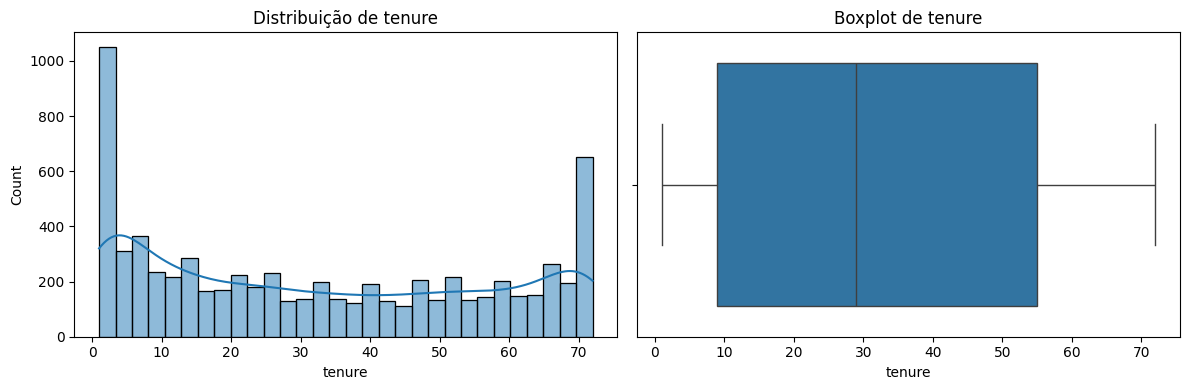

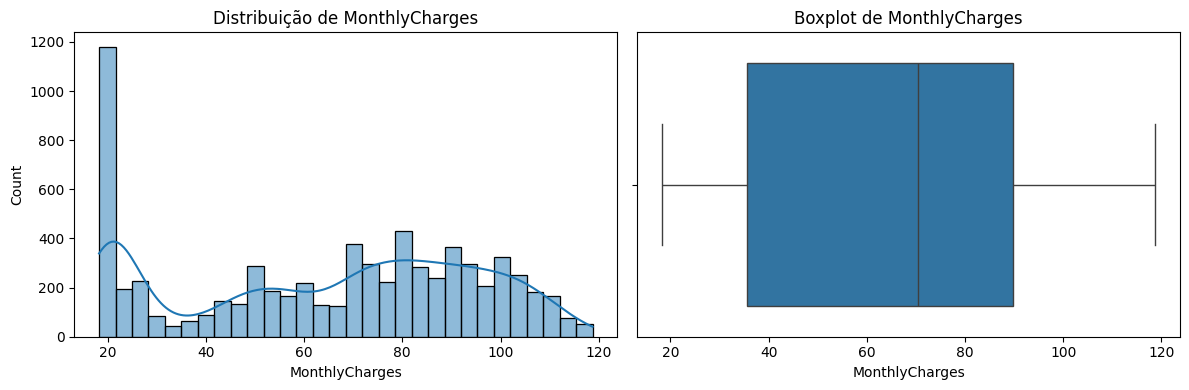

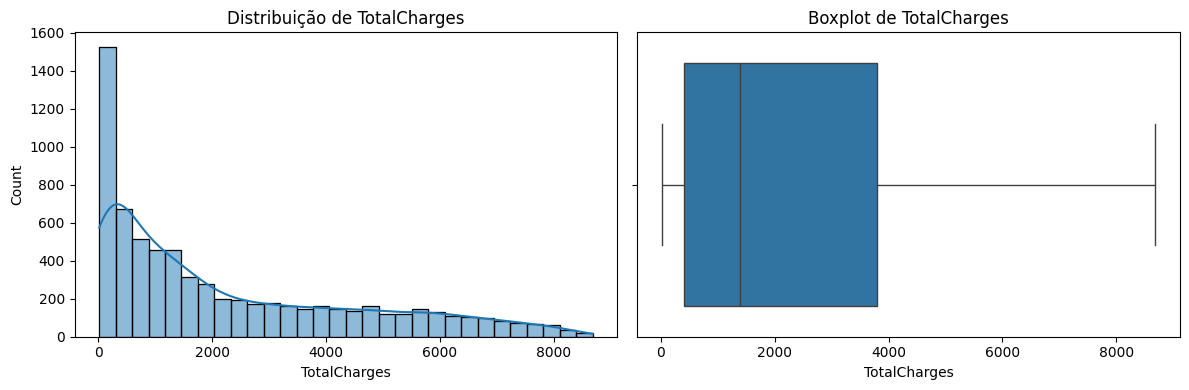

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar histogramas e boxplots
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_vars:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(dados[col], bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f'Distribuição de {col}')
    
    sns.boxplot(x=dados[col], ax=ax[1])
    ax[1].set_title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()


In [10]:
# Correlação de Pearson entre variáveis numéricas
dados[num_vars].corr()


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


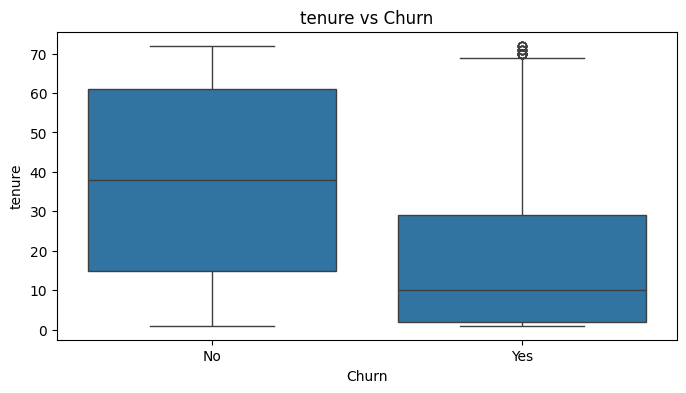

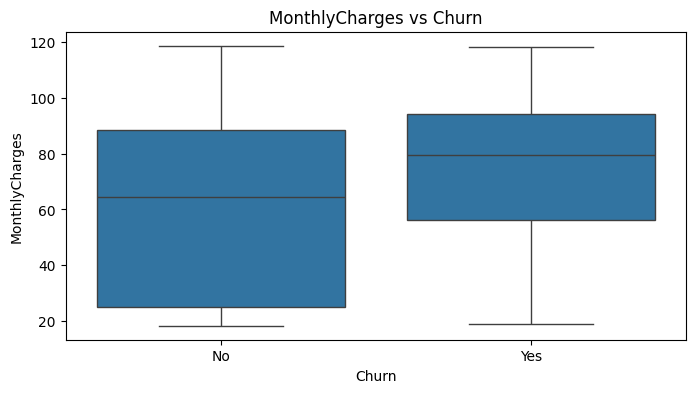

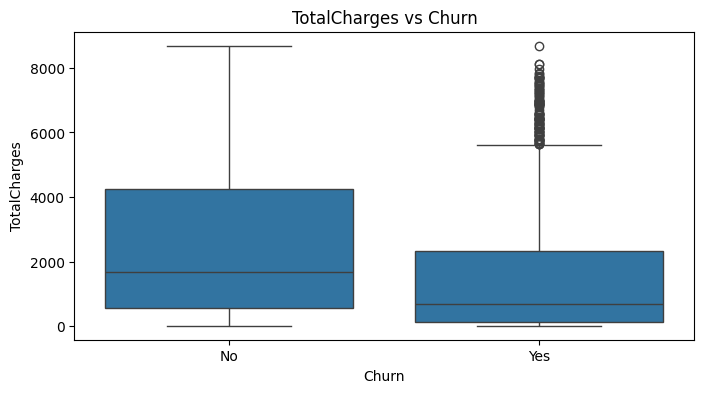

In [11]:
# Boxplots de variáveis numéricas por Churn
for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, data=dados)
    plt.title(f'{col} vs Churn')
    plt.show()


In [12]:
dados['tenure_group'] = pd.cut(dados['tenure'],
                            bins=[0, 6, 12, 24, 48, 60, 72],
                            labels=['0-6', '7-12', '13-24', '25-48', '49-60', '61-72'])


In [13]:
# Verifica valores ausentes "reais"
print("Valores ausentes explícitos:")
print(dados.isnull().sum())

# Verifica valores vazios ou espaços em branco em colunas do tipo object
print("\nValores ausentes disfarçados ('' ou espaços):")
for col in dados.select_dtypes(include='object').columns:
    empty_count = dados[col].apply(lambda x: str(x).strip() == '').sum()
    if empty_count > 0:
        print(f"{col}: {empty_count} valores vazios/espaços")


Valores ausentes explícitos:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
TenureGroup         0
DailyCharges        0
tenure_group        0
dtype: int64

Valores ausentes disfarçados ('' ou espaços):


In [14]:
problemas_encontrados = False

for col in object_cols:
    disfarcados = dados[col].apply(lambda x: isinstance(x, str) and x.strip() == '')
    count_disfarcados = disfarcados.sum()
    if count_disfarcados > 0:
        print(f"Coluna '{col}' possui {count_disfarcados} valores ausentes disfarçados.")
        problemas_encontrados = True

if not problemas_encontrados:
    print("✔️ Nenhuma coluna com valores ausentes disfarçados foi encontrada.")


NameError: name 'object_cols' is not defined

In [ ]:
# Seleciona apenas colunas numéricas
df_numericas = dados.select_dtypes(include=['float64', 'int64'])

# Verifica o nome das colunas selecionadas
df_numericas.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'DailyCharges'],
      dtype='object')

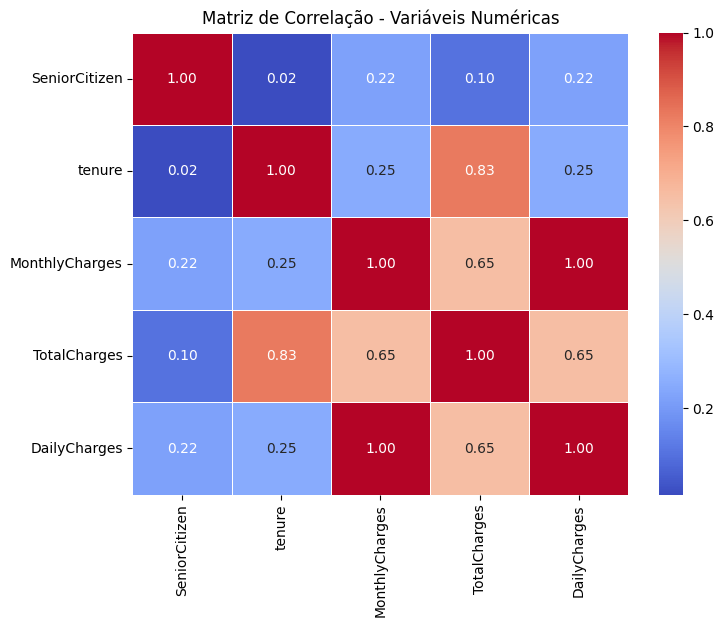

In [ ]:
# Calcula a matriz de correlação
matriz_corr = df_numericas.corr()

# Cria o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()


In [ ]:
dados.drop(columns=['DailyCharges'], inplace=True)


In [ ]:
dados['ExpectedTotal'] = dados['MonthlyCharges'] * dados['tenure']
dados['ChargeDeviation'] = dados['TotalCharges'] - dados['ExpectedTotal']


In [ ]:
dados[['TotalCharges', 'ExpectedTotal', 'ChargeDeviation']].describe(). round(4)


,TotalCharges,ExpectedTotal,ChargeDeviation
count,7032.0000,7032.0000,7032.0000
mean,2283.3004,2283.1472,0.1532
std,2266.7714,2264.7033,67.2553
min,18.8000,18.8000,-370.8500
25%,401.4500,397.8000,-28.6500
50%,1397.4750,1394.5750,0.0000
75%,3794.7375,3791.2500,28.7000
max,8684.8000,8550.0000,373.2500


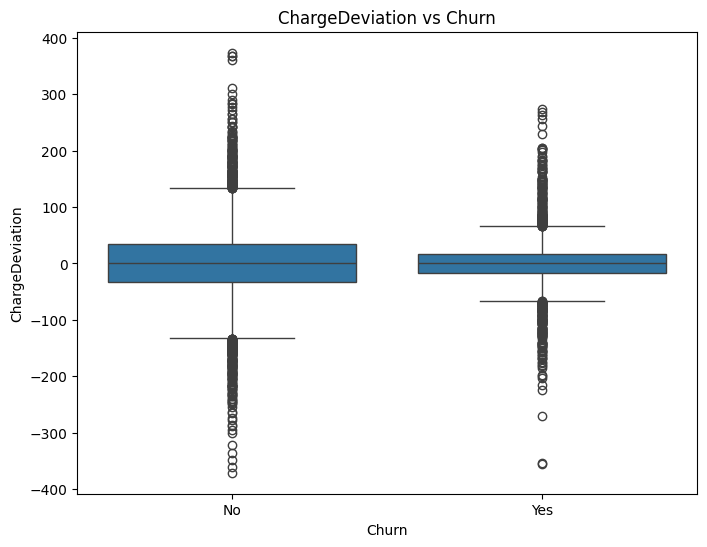

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=dados, x='Churn', y='ChargeDeviation')
plt.title('ChargeDeviation vs Churn')
plt.show()

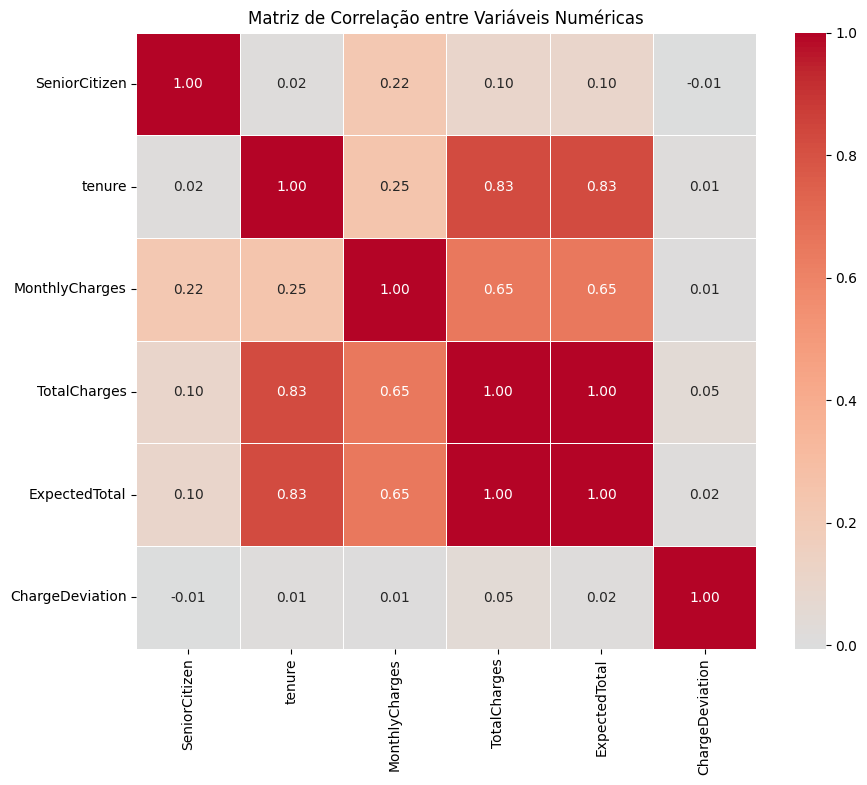

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Selecionar colunas numéricas (sem a variável alvo 'Churn')
variaveis_numericas = dados.select_dtypes(include='number')

# 2. Calcular a matriz de correlação
matriz_correlacao = variaveis_numericas.corr()

# 3. Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


In [ ]:
dados.drop(columns=['customerID'], inplace=True)


In [ ]:
# Verificar variáveis com baixa variância
colunas_com_baixa_variancia = []

for col in dados.columns:
    top_freq = dados[col].value_counts(normalize=True).values[0]
    if top_freq > 0.95:
        colunas_com_baixa_variancia.append((col, top_freq))

if colunas_com_baixa_variancia:
    for col, freq in colunas_com_baixa_variancia:
        print(f"{col}: {freq:.2%} da mesma categoria")
else:
    print("✔️ Nenhuma coluna com baixa variabilidade foi encontrada.")


✔️ Nenhuma coluna com baixa variabilidade foi encontrada.


In [ ]:
# Quantidade de valores ausentes por coluna
faltantes = dados.isnull().sum()
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)

if not faltantes.empty:
    print("🔎 Colunas com valores ausentes:")
    display(faltantes)
else:
    print("✔️ Nenhuma coluna com valores ausentes foi encontrada via isnull().")


✔️ Nenhuma coluna com valores ausentes foi encontrada via isnull().


In [ ]:
# Verificando valores disfarçados de nulos
valores_disfarçados = ['?', ' ', '', 'unknown', 'n/a', 'na', 'null', 'None']
valores_encontrados_flag = False

for col in dados.columns:
    if dados[col].dtype == 'object':
        qtd = dados[col].isin(valores_disfarçados).sum()
        if qtd > 0:
            print(f"⚠️ Coluna '{col}' contém {qtd} valores disfarçados de nulos.")
            valores_encontrados_flag = True

if not valores_encontrados_flag:
    print("✔️ Nenhum valor disfarçado de nulo foi encontrado nas colunas do tipo string.")


✔️ Nenhum valor disfarçado de nulo foi encontrado nas colunas do tipo string.


In [ ]:
# Verificando valores nulos reais
valores_nulos = dados.isnull().sum()
valores_nulos_percent = (valores_nulos / len(dados)) * 100
df_nulos = pd.DataFrame({'Total de Nulos': valores_nulos, 'Percentual (%)': valores_nulos_percent})
df_nulos = df_nulos[df_nulos['Total de Nulos'] > 0].sort_values(by='Percentual (%)', ascending=False)

if df_nulos.empty:
    print("✔️ Nenhuma coluna possui valores nulos reais (`NaN`).")
else:
    print("⚠️ Colunas com valores nulos detectadas:")
    display(df_nulos)


✔️ Nenhuma coluna possui valores nulos reais (`NaN`).


In [ ]:
# Verificando tipos de dados antes da conversão
print(dados.dtypes)

# Forçando conversão para float e observando se há problemas
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

# Revalidando se algo virou NaN após a conversão
valores_na_totalcharges = dados['TotalCharges'].isna().sum()

if valores_na_totalcharges > 0:
    print(f"⚠️ {valores_na_totalcharges} valores em 'TotalCharges' se tornaram NaN após a conversão.")
else:
    print("✔️ 'TotalCharges' convertida com sucesso para numérico e sem gerar novos NaNs.")


Churn                 object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
TenureGroup           object
DailyCharges         float64
tenure_group        category
dtype: object
✔️ 'TotalCharges' convertida com sucesso para numérico e sem gerar novos NaNs.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Lista de colunas binárias (com 2 categorias apenas)
colunas_binarias = [col for col in dados.select_dtypes(include='object').columns if dados[col].nunique() == 2]

# Aplicando LabelEncoder nas binárias
le = LabelEncoder()
for col in colunas_binarias:
    dados[col] = le.fit_transform(dados[col])

print("✔️ Colunas binárias codificadas com sucesso:")
print(colunas_binarias)


✔️ Colunas binárias codificadas com sucesso:
['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [ ]:
# Selecionar colunas categóricas restantes (multiclasse)
colunas_multiclasse = [col for col in dados.select_dtypes(include='object').columns if dados[col].nunique() > 2]

# Aplicar One Hot Encoding
dados = pd.get_dummies(dados, columns=colunas_multiclasse, drop_first=True)

print("✔️ One Hot Encoding aplicado com sucesso nas seguintes colunas:")
print(colunas_multiclasse)


✔️ One Hot Encoding aplicado com sucesso nas seguintes colunas:
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'TenureGroup']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecionar colunas numéricas
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Inicializar o scaler
scaler = StandardScaler()

# Aplicar padronização
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

print("✔️ Padronização aplicada com sucesso nas seguintes colunas:")
print(list(colunas_numericas))


✔️ Padronização aplicada com sucesso nas seguintes colunas:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']


In [17]:
# Removendo a coluna customerID antes da modelagem
if 'customerID' in dados.columns:
    dados.drop(columns=['customerID'], inplace=True)


In [18]:
# Salvar o dataset completo pré-processado
dados.to_csv('dados_tratados_churn.csv', index=False)


In [19]:
from sklearn.model_selection import train_test_split

# Separar variável alvo
X = dados.drop('Churn', axis=1)
y = dados['Churn']

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✔️ Divisão feita com sucesso:")
print(f"Dados de treino: {X_train.shape}")
print(f"Dados de teste: {X_test.shape}")


✔️ Divisão feita com sucesso:
Dados de treino: (5625, 22)
Dados de teste: (1407, 22)


In [20]:
# Salvar os conjuntos separados
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
